In [1]:
#Initialization and imports
%matplotlib inline
%run config.py
import dataframes as dfs
dfBuilder = dfs.DataFramesBuilder()
enotites = dfs.defs.enotites

#Read and combine exoda
ex12 = dfBuilder.read_exoda("../data/ex_2012.xls")
ex12['year'] = '2012'
ex13 = dfBuilder.read_exoda("../data/ex_2013.xls")
ex13['year'] = '2013'
ex14 = dfBuilder.read_exoda("../data/ex_2014.xls")
ex14['year'] = '2014'
ex = ex12.append(ex13.append(ex14))
dfBuilder.set_inner_dataframe(ex)
ex = dfBuilder.add_extra_fields()

#Read and combine esoda
es12 = dfBuilder.read_esoda("../data/es_2012.xls")
es12['year'] = '2012'
es13 = dfBuilder.read_esoda("../data/es_2013.xls")
es13['year'] = '2013'
es14 = dfBuilder.read_esoda("../data/es_2014.xls")
es14['year'] = '2014'
es = es12.append(es13.append(es14))
dfBuilder.set_inner_dataframe(es)
es = dfBuilder.add_extra_fields()


In [2]:
#Get esoda as xilia
esd = dfBuilder.get_xilia_df(es)
#esd = esd[(esd.enotita!='00') & (esd.xilia == '9')]
esd = esd[(esd.enotita!='00')]

#Get certain columns and group by
esd = esd[['year','enotita','eggekrimenos','diamorfomenos']]
esg = esd.groupby(['enotita','year']).sum()

#Get exoda as xilia
exd = dfBuilder.get_xilia_df(ex)
#exd = exd[(exd.enotita!='00') & (exd.xilia == '9')]
exd = exd[(exd.enotita!='00')]

#Get certain columns and group by
exd = exd[['year','enotita','eggekrimenos','diamorfomenos','desmefthenta','plirothenta']]
exg = exd.groupby(['enotita','year']).sum()

In [3]:
#Flatten the groupby esoda
esgd = esg.copy()
esgd = esgd.add_suffix('_es').reset_index()
#Flatten the groupby exoda
exgd = exg.copy()
exgd = exgd.add_suffix('_ex').reset_index()
#Merge the two dataframes
mgd = pd.merge(esgd, exgd, on=['enotita','year'])

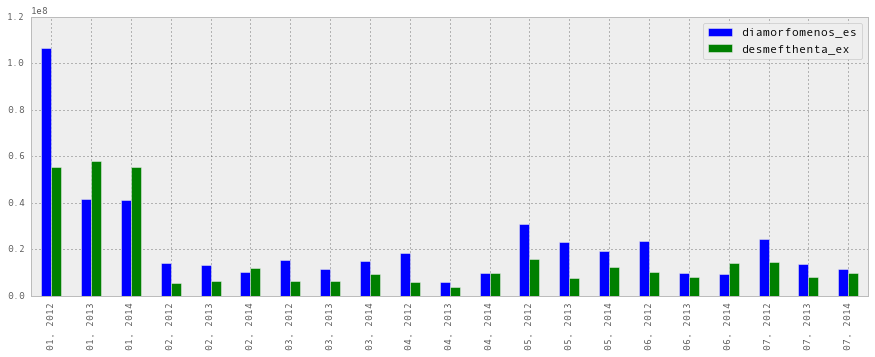

In [4]:
ax = mgd[['enotita','year','diamorfomenos_es','desmefthenta_ex']].plot(kind='bar')
ax.set_xticklabels(mgd.enotita + ', ' + mgd.year)

In [6]:
mgd['diafora_es_ex'] = mgd.diamorfomenos_es - mgd.plirothenta_ex
mgden = mgd[mgd.enotita == '04']
mgden

,enotita,year,eggekrimenos_es,diamorfomenos_es,eggekrimenos_ex,diamorfomenos_ex,desmefthenta_ex,plirothenta_ex,diafora_es_ex
9,04,2012,"17,644,399.87","18,224,221.63","17,530,419.87","18,065,941.63","5,932,375.18","4,990,924.91","13,233,296.72"
10,04,2013,"3,185,790.00","5,940,367.14","7,537,308.47","14,668,294.46","3,876,510.13","3,219,120.78","2,721,246.36"
11,04,2014,"5,897,549.15","9,825,573.26","7,558,692.15","19,562,801.68","9,905,116.54","2,351,268.72","7,474,304.54"
